In [53]:
import numpy as np
import matplotlib.pyplot as plt
import dataclasses
from lisatools_wdm.mcmc.setup import setup
from lisatools_wdm.mcmc.emcee_analysis import run_emcee

mcmc_data = setup(
        T=0.2,
        sampling_frequency=0.01
)


In [ ]:
sampler = run_emcee(mcmc_data, nwalkers=10, nsteps=1000)

  2%|▏         | 24/1000 [01:48<1:13:26,  4.51s/it]

In [40]:

# from lisatools_wdm.mcmc.setup import setup
# 
# mcmc_data = setup()

eryn: Exception while calling your likelihood function:
  args added: [array([-50.57556739,  -6.04925393, -38.75734452])]
  args: (array([1.11820901, 4.91128699, 2.3290324 , 5.22979888, 0.9805743 ]), <lisatools_wdm.analysiscontainer.AnalysisContainer object at 0x1335c1e90>)
  kwargs added: {}
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/Users/avaj0001/Documents/projects/WDMWaveletTransforms/venv/lib/python3.11/site-packages/eryn/ensemble.py", line 1644, in __call__
    out = self.f(*args_in, **kwargs_in)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/qt/rxjvm_j566v9qn7g754s1v9hzb3p7f/T/ipykernel_15506/1969310409.py", line 17, in wrapper_likelihood
    ll = analysis.calculate_signal_likelihood(
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/avaj0001/Documents/projects/WDMWaveletTransforms/venv/lib/python3.11/site-packages/lisatools/analysiscontainer.py", line 365, in calculate_signal_likelihood
    return self._calculate_signal_operation(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/avaj0001/Documents/projects/WDMWaveletTransforms/venv/lib/python3.11/site-packages/lisatools/analysiscontainer.py", line 321, in _calculate_signal_operation
    self.signal_gen(*args_in, **waveform_kwargs), **data_res_arr_kwargs
    ^^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

In [43]:
import emcee


def ln_prior(params, fixed_parameters):
    lna = params[0]
    lnf = params[1]
    lnfdot = params[2]
    if not (ln_arange[0] < lna < ln_arange[1]):
        return -np.inf
    if not (lnf_range[0] < lnf < lnf_range[1]):
        return -np.inf
    if not (lnfdot_range[0] < lnfdot < lnfdot_range[1]):
        return -np.inf
    return 0.0

def ln_prob(params, fixed_parameters, analysis):
    lp = ln_prior(params, fixed_parameters)
    if not np.isfinite(lp):
        return -np.inf
    return lp + wrapper_likelihood(params, fixed_parameters, analysis)

sampler = emcee.EnsembleSampler(
    nwalkers,
    ndims["gb"],
    ln_prob,
    args=(fixed_parameters, analysis),
    # parameter_names = 'lnA lnf lnfdot'.split(),
)
mcmc_start = np.array([np.log(A), np.log(f), np.log(fdot)]) + 1e-7 * np.random.randn(nwalkers, ndims["gb"])
mcmc_out = sampler.run_mcmc(mcmc_start, 00, progress=True)


100%|██████████| 100/100 [05:57<00:00,  3.58s/it]


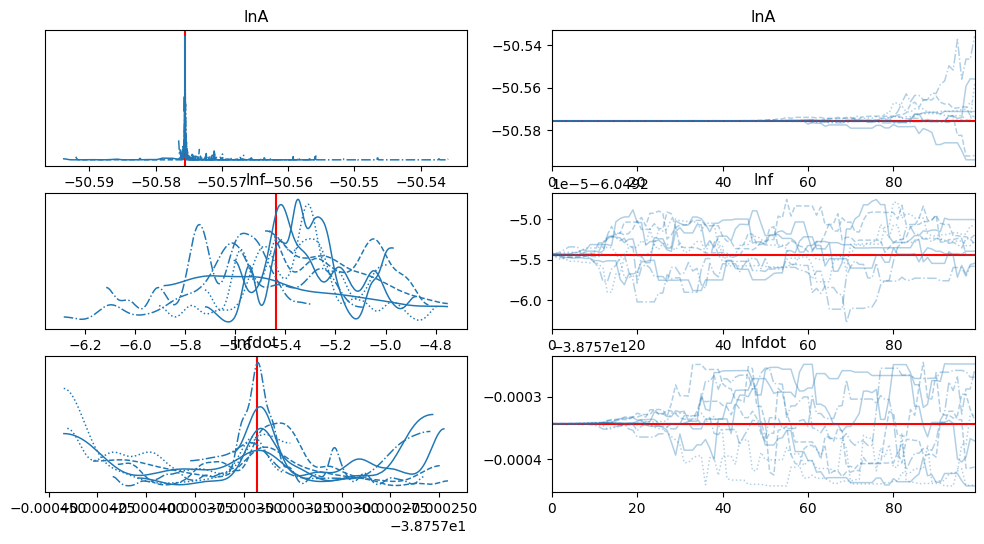

In [48]:
import arviz as az

inf_obj = az.from_emcee(sampler, var_names=["lnA", "lnf", "lnfdot"])
trues = np.array([np.log(A), np.log(f), np.log(fdot)])
axes = az.plot_trace(inf_obj)
for i, ax_set in enumerate(axes):
    ax_set[0].axvline(trues[i], color="red", zorder=-1)
    ax_set[1].axhline(trues[i], color="red", zorder=-1)
